In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [1]:
%load_ext memory_profiler

In [10]:
import pandas as pd
import pystrel as ps
import scipy.special as sp
import numpy as np
from IPython.display import clear_output

def measure_memory(*, L, sparsity):
    model = ps.Model({"terms":{
        "Jz":{(i, i+1): 1.0 for i in range(L-1)},
        "hz":{i: 2.0 for i in range(L)},
    }})
    h = model.build_hamiltonian(sparsity=sparsity, dtype=np.float64)
    del h

In [27]:
sizes = []
mem =  []
for L in  range(4, 17):
    result = %memit -q -o measure_memory(L=L, sparsity="dense")
    mem.append(m := max(result.mem_usage)-result.baseline) 
    sizes.append(int(sp.binom(L, L / 2)))
    print(L, m)

df_dense = pd.DataFrame({"size": sizes, "mem": mem})
clear_output()
df_dense

,size,mem
0,6,0.000000
1,10,0.000000
2,20,0.000000
3,37,0.000000
4,70,0.000000
5,132,0.000000
6,252,0.000000
7,481,0.000000
8,924,0.000000
9,1778,21.453125


In [13]:
sizes = []
mem =  []
for L in range(4, 22):
    result = %memit -o -q measure_memory(L=L, sparsity="sparse")
    mem.append(m := max(result.mem_usage)-result.baseline) 
    sizes.append(int(sp.binom(L, L / 2)))
    print(L, m)
df_sparse = pd.DataFrame({"size": sizes, "mem": mem})
clear_output()
df_sparse

,size,mem
0,6,0.000000
1,10,0.000000
2,20,0.000000
3,37,0.000000
4,70,0.000000
5,132,0.003906
6,252,0.000000
7,481,0.003906
8,924,0.019531
9,1778,0.000000


## Results

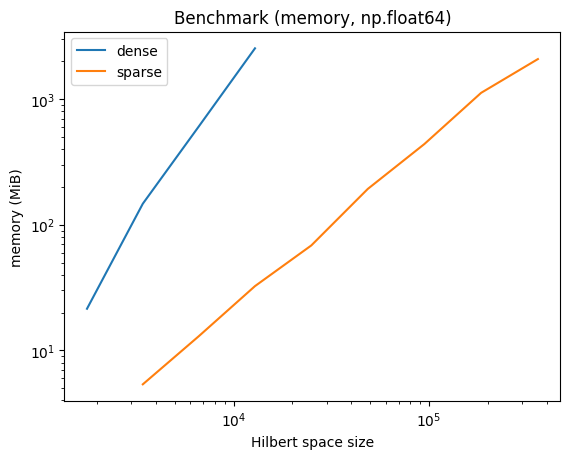

In [40]:
import matplotlib.pyplot as plt

dense = df_dense[df_dense["size"] > 1000]
sparse = df_sparse[df_sparse["size"] > 2000]

plt.title("Benchmark (memory, np.float64)")
plt.xlabel("Hilbert space size")
plt.ylabel("memory (MiB)")
plt.plot(dense["size"], dense["mem"], label='dense')
plt.plot(sparse["size"], sparse["mem"], label='sparse')
plt.loglog()
plt.legend()
plt.show()